In [1]:
__imp

/home/abhishek/anaconda3/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


Libraries have been loaded


## Load Additional Libraries

In [2]:
from IPython.display import display
from sklearn.externals import joblib

from sklearn.metrics import roc_auc_score

basepath = os.path.expanduser('../')

In [3]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

## Load Data

In [4]:
%%time

app_train   = pd.read_pickle(os.path.join(basepath, 'data/interim/feature_groups/application_train.pkl'))
app_test    = pd.read_pickle(os.path.join(basepath, 'data/interim/feature_groups/application_test.pkl'))

CPU times: user 28.7 ms, sys: 61.4 ms, total: 90.2 ms
Wall time: 533 ms


In [5]:
%%time

# additional tables

bureau       = pd.read_pickle(os.path.join(basepath, 'data/interim/feature_groups/bureau.pkl'))
bureau_bal   = pd.read_pickle(os.path.join(basepath, 'data/interim/feature_groups/bureau_balance.pkl'))
prev_app     = pd.read_pickle(os.path.join(basepath, 'data/interim/feature_groups/previous_application.pkl'))
installments = pd.read_pickle(os.path.join(basepath, 'data/interim/feature_groups/installments_payments.pkl')) 
pos_cash     = pd.read_pickle(os.path.join(basepath, 'data/interim/feature_groups/POS_CASH_balance.pkl'))
credit_bal   = pd.read_pickle(os.path.join(basepath, 'data/interim/feature_groups/credit_card_balance.pkl'))

CPU times: user 438 ms, sys: 1.95 s, total: 2.39 s
Wall time: 20.8 s


## Random Customer

In [6]:
SK_ID_CURR = app_train[app_train.TARGET == 1].sample(n=100).SK_ID_CURR.values[0]; SK_ID_CURR

316817

### Current Application

In [7]:
display_all(app_train.loc[app_train.SK_ID_CURR == SK_ID_CURR].T)

,187028
AMT_ANNUITY,38686.5
AMT_CREDIT,755190
AMT_GOODS_PRICE,675000
AMT_INCOME_TOTAL,382500
AMT_REQ_CREDIT_BUREAU_DAY,0
AMT_REQ_CREDIT_BUREAU_HOUR,0
AMT_REQ_CREDIT_BUREAU_MON,0
AMT_REQ_CREDIT_BUREAU_QRT,0
AMT_REQ_CREDIT_BUREAU_WEEK,0
AMT_REQ_CREDIT_BUREAU_YEAR,7


### Bureau

In [8]:
display_all(bureau.loc[bureau.SK_ID_CURR == SK_ID_CURR].T)

,1167018,1167019,1167020,1167021
SK_ID_CURR,316817,316817,316817,316817
SK_ID_BUREAU,6198732,6198733,6198734,6198735
CREDIT_ACTIVE,Active,Active,Active,Active
CREDIT_CURRENCY,currency 1,currency 1,currency 1,currency 1
DAYS_CREDIT,-713,-1057,-390,-165
CREDIT_DAY_OVERDUE,0,0,0,0
DAYS_CREDIT_ENDDATE,1113,770,1436,1661
DAYS_ENDDATE_FACT,NaN,NaN,NaN,NaN
AMT_CREDIT_MAX_OVERDUE,NaN,NaN,25636.5,0
CNT_CREDIT_PROLONG,0,0,0,0


### Bureau Balance

In [9]:
display_all(bureau.loc[bureau.SK_ID_CURR == SK_ID_CURR, ['SK_ID_BUREAU']]\
                  .merge(bureau_bal, on=['SK_ID_BUREAU'], how='left'))

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,6198732,NaN,NaN
1,6198733,NaN,NaN
2,6198734,NaN,NaN
3,6198735,NaN,NaN


### Previous Application

In [57]:
display_all(prev_app.loc[prev_app.SK_ID_CURR == SK_ID_CURR, :].sort_values(by='DAYS_DECISION', ascending=False).T)

,547680,1582668,508446,1341236
SK_ID_PREV,1216752,2674055,1517754,1371563
SK_ID_CURR,251618,251618,251618,251618
NAME_CONTRACT_TYPE,Consumer loans,Consumer loans,Consumer loans,Consumer loans
AMT_ANNUITY,5936.67,13523.5,4946.49,5989
AMT_APPLICATION,58819.5,133916,26955,55980
AMT_CREDIT,58819.5,133250,24259.5,49950
AMT_DOWN_PAYMENT,0,13392,2695.5,6030
AMT_GOODS_PRICE,58819.5,133916,26955,55980
WEEKDAY_APPR_PROCESS_START,FRIDAY,SUNDAY,WEDNESDAY,WEDNESDAY
HOUR_APPR_PROCESS_START,19,13,17,20


### POS Cash

In [58]:
display_all(prev_app.loc[prev_app.SK_ID_CURR == SK_ID_CURR, ['SK_ID_CURR', 'SK_ID_PREV']]\
                    .merge(pos_cash.sort_values(by=['SK_ID_CURR', 'SK_ID_PREV', 'MONTHS_BALANCE'], 
                                                ascending=[True, True, False]), 
                           on=['SK_ID_CURR', 'SK_ID_PREV'], how='left')) 

,SK_ID_CURR,SK_ID_PREV,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,251618,1517754,-46,4.0,0.0,Completed,0,0
1,251618,1517754,-47,4.0,1.0,Active,0,0
2,251618,1517754,-48,4.0,2.0,Active,0,0
3,251618,1517754,-49,4.0,3.0,Active,0,0
4,251618,1517754,-50,4.0,4.0,Active,0,0
5,251618,1216752,-3,4.0,0.0,Completed,0,0
6,251618,1216752,-4,12.0,9.0,Active,0,0
7,251618,1216752,-5,12.0,10.0,Active,0,0
8,251618,1216752,-6,12.0,11.0,Active,0,0
9,251618,1216752,-7,12.0,12.0,Active,0,0


### Credit Balance

In [37]:
display_all(prev_app.loc[prev_app.SK_ID_CURR == SK_ID_CURR, ['SK_ID_CURR', 'SK_ID_PREV']]\
                    .merge(credit_bal.sort_values(by=['SK_ID_CURR','SK_ID_PREV','MONTHS_BALANCE'], 
                                                  ascending=[True, True, False]), 
                           on=['SK_ID_CURR', 'SK_ID_PREV'], how='left')) 

,SK_ID_CURR,SK_ID_PREV,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,311137,1185379,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,311137,1885239,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,311137,2706156,-2.0,0.000000,90000.0,0.0,0.0000,0.0,0.0000,0.000000,8.640000,8.640000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,17.0,Active,0.0,0.0
3,311137,2706156,-3.0,0.000000,90000.0,0.0,0.0000,0.0,0.0000,0.000000,8.640000,8.640000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,17.0,Active,0.0,0.0
4,311137,2706156,-4.0,0.000000,90000.0,0.0,0.0000,0.0,0.0000,0.000000,8.640000,8.640000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,17.0,Active,0.0,0.0
5,311137,2706156,-5.0,0.000000,90000.0,0.0,0.0000,0.0,0.0000,0.000000,8.640000,8.640000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,17.0,Active,0.0,0.0
6,311137,2706156,-6.0,0.000000,90000.0,0.0,0.0000,0.0,0.0000,0.000000,8.640000,8.640000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,17.0,Active,0.0,0.0
7,311137,2706156,-7.0,0.000000,90000.0,0.0,0.0000,0.0,0.0000,0.000000,8.640000,8.640000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,17.0,Active,0.0,0.0
8,311137,2706156,-8.0,0.000000,90000.0,0.0,0.0000,0.0,0.0000,0.000000,8.640000,8.640000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,17.0,Active,0.0,0.0
9,311137,2706156,-9.0,0.000000,90000.0,0.0,0.0000,0.0,0.0000,0.000000,8.640000,8.640000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,17.0,Active,0.0,0.0


### Installments

In [36]:
display_all(prev_app.loc[prev_app.SK_ID_CURR == SK_ID_CURR, ['SK_ID_CURR', 'SK_ID_PREV']]\
                    .merge(installments.sort_values(by=['SK_ID_CURR',
                                                        'SK_ID_PREV',
                                                        'NUM_INSTALMENT_NUMBER']), 
                           on=['SK_ID_CURR', 'SK_ID_PREV'], how='left')) 

,SK_ID_CURR,SK_ID_PREV,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,311137,1185379,1.0,1,-769.0,-786.0,6675.884766,190.080002
1,311137,1185379,1.0,1,-769.0,-766.0,6675.884766,6485.805176
2,311137,1185379,1.0,2,-739.0,-754.0,6675.884766,281.475006
3,311137,1185379,1.0,2,-739.0,-729.0,6675.884766,6394.410156
4,311137,1185379,1.0,3,-709.0,-729.0,6675.884766,372.869995
5,311137,1185379,1.0,3,-709.0,-698.0,6675.884766,6303.015137
6,311137,1185379,1.0,4,-679.0,-666.0,6675.884766,6211.620117
7,311137,1185379,1.0,4,-679.0,-688.0,6675.884766,464.265015
8,311137,1185379,1.0,5,-649.0,-654.0,6675.884766,6675.884766
9,311137,1185379,1.0,6,-619.0,-622.0,6663.734863,1353.555054


## Hypothesis

### Pensioners vs other Income types

In [6]:
app_train.NAME_INCOME_TYPE.value_counts()

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

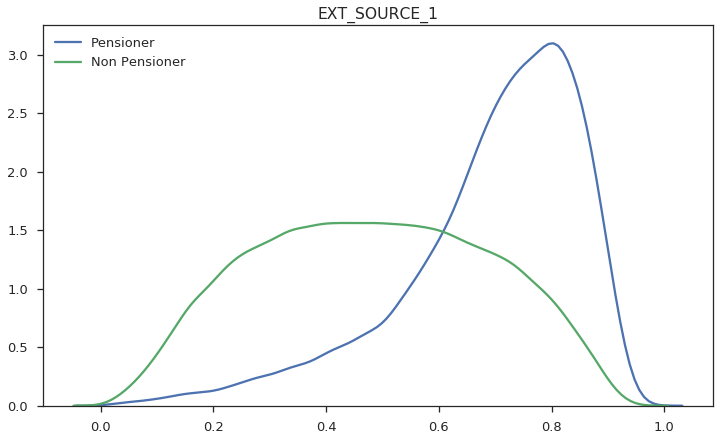

In [12]:
mask = (app_train.NAME_INCOME_TYPE == 'Pensioner')

plt.figure(figsize=(12, 7))
sns.kdeplot(app_train.loc[mask].EXT_SOURCE_1, label='Pensioner')
sns.kdeplot(app_train.loc[~mask].EXT_SOURCE_1, label='Non Pensioner')
plt.title('EXT_SOURCE_1');

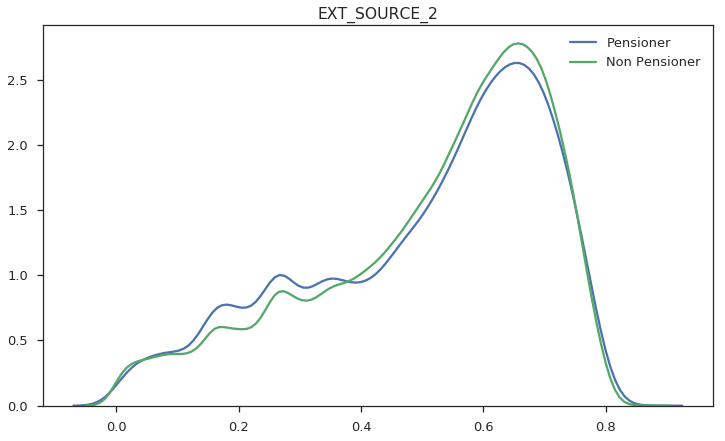

In [13]:
mask = (app_train.NAME_INCOME_TYPE == 'Pensioner')

plt.figure(figsize=(12, 7))
sns.kdeplot(app_train.loc[mask].EXT_SOURCE_2, label='Pensioner')
sns.kdeplot(app_train.loc[~mask].EXT_SOURCE_2, label='Non Pensioner')
plt.title('EXT_SOURCE_2');

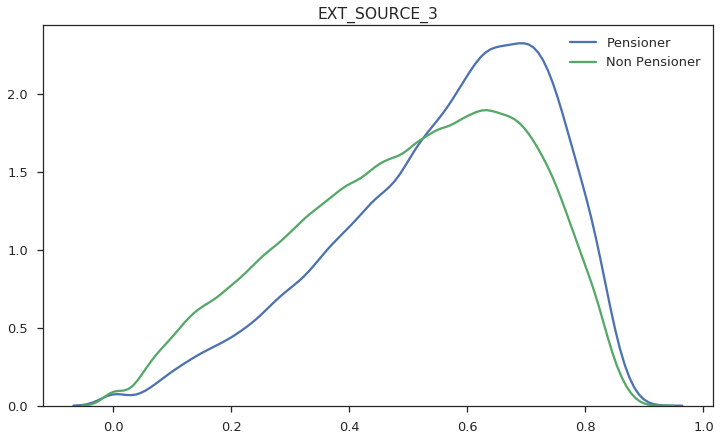

In [14]:
mask = (app_train.NAME_INCOME_TYPE == 'Pensioner')

plt.figure(figsize=(12, 7))
sns.kdeplot(app_train.loc[mask].EXT_SOURCE_3, label='Pensioner')
sns.kdeplot(app_train.loc[~mask].EXT_SOURCE_3, label='Non Pensioner')
plt.title('EXT_SOURCE_3');

** Notes **

- EXT_SOURCE_1 has a completely different distribution for Pensioners and Non-Pensioners.

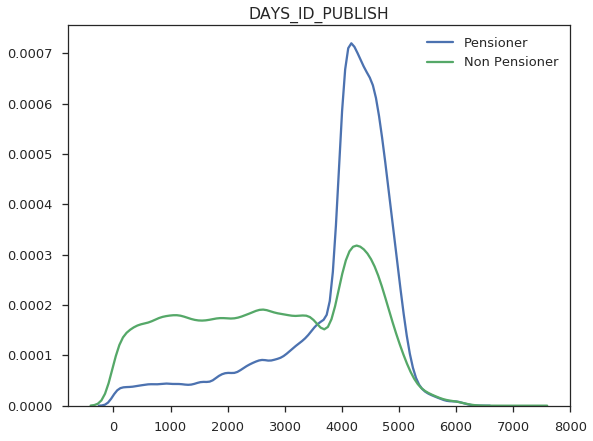

In [18]:
mask = (app_train.NAME_INCOME_TYPE == 'Pensioner')

plt.figure(figsize=(9, 7))
sns.kdeplot(-app_train.loc[mask, 'DAYS_ID_PUBLISH'], label='Pensioner')
sns.kdeplot(-app_train.loc[~mask, 'DAYS_ID_PUBLISH'], label='Non Pensioner')
plt.title('DAYS_ID_PUBLISH');

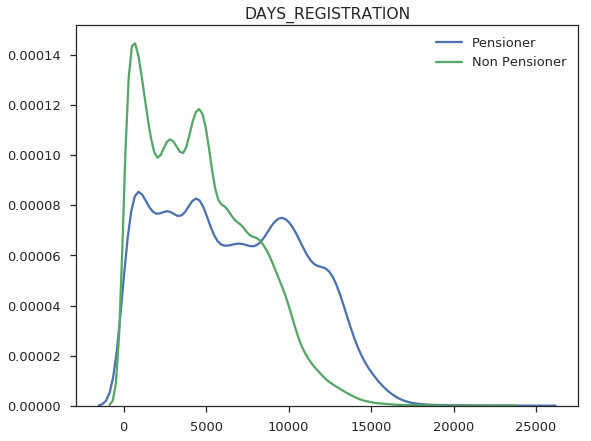

In [19]:
mask = (app_train.NAME_INCOME_TYPE == 'Pensioner')

plt.figure(figsize=(9, 7))
sns.kdeplot(-app_train.loc[mask, 'DAYS_REGISTRATION'], label='Pensioner')
sns.kdeplot(-app_train.loc[~mask, 'DAYS_REGISTRATION'], label='Non Pensioner')
plt.title('DAYS_REGISTRATION');

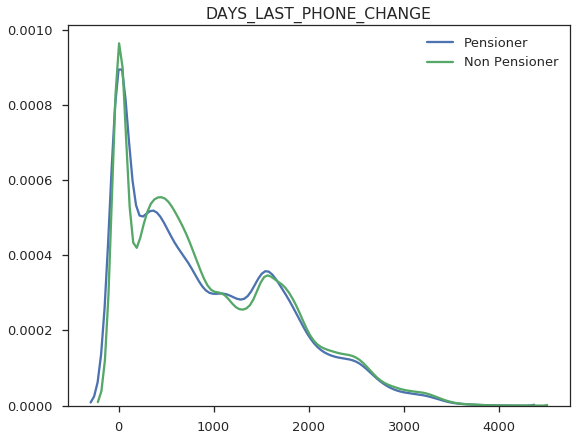

In [21]:
mask = (app_train.NAME_INCOME_TYPE == 'Pensioner')

plt.figure(figsize=(9, 7))
sns.kdeplot(-app_train.loc[mask, 'DAYS_LAST_PHONE_CHANGE'], label='Pensioner')
sns.kdeplot(-app_train.loc[~mask, 'DAYS_LAST_PHONE_CHANGE'], label='Non Pensioner')
plt.title('DAYS_LAST_PHONE_CHANGE');

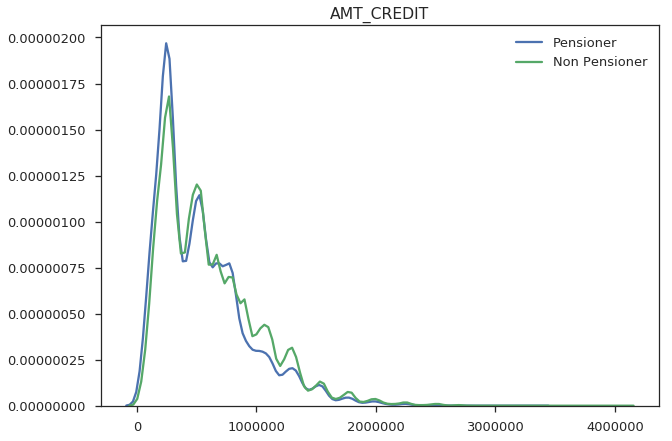

In [24]:
mask = (app_train.NAME_INCOME_TYPE == 'Pensioner')

plt.figure(figsize=(10, 7))
sns.kdeplot(app_train.loc[mask, 'AMT_CREDIT'], label='Pensioner')
sns.kdeplot(app_train.loc[~mask, 'AMT_CREDIT'], label='Non Pensioner')
plt.title('AMT_CREDIT');

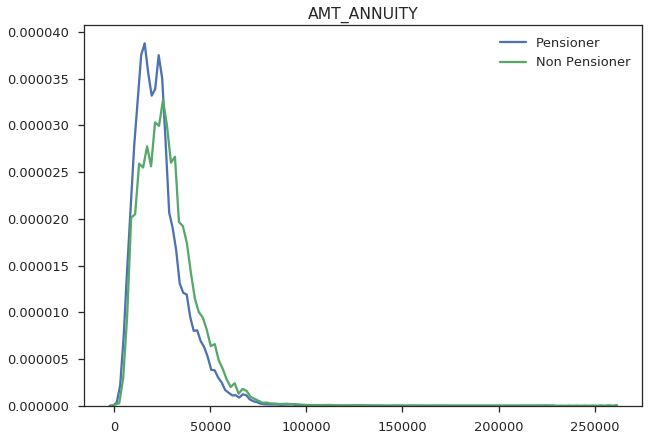

In [25]:
mask = (app_train.NAME_INCOME_TYPE == 'Pensioner')

plt.figure(figsize=(10, 7))
sns.kdeplot(app_train.loc[mask, 'AMT_ANNUITY'], label='Pensioner')
sns.kdeplot(app_train.loc[~mask, 'AMT_ANNUITY'], label='Non Pensioner')
plt.title('AMT_ANNUITY');

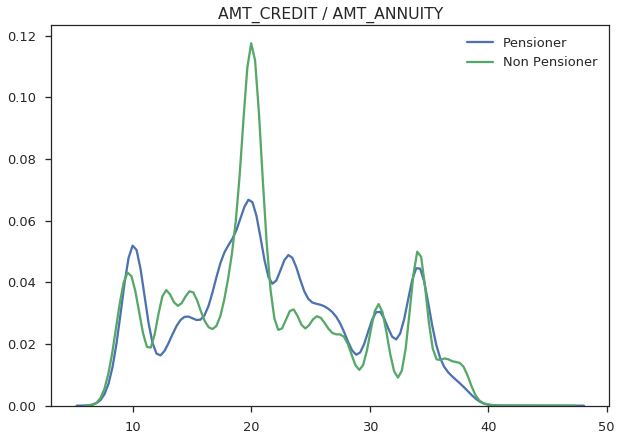

In [26]:
mask = (app_train.NAME_INCOME_TYPE == 'Pensioner')

plt.figure(figsize=(10, 7))
sns.kdeplot(app_train.loc[mask, 'AMT_CREDIT'] / app_train.loc[mask, 'AMT_ANNUITY'], label='Pensioner')
sns.kdeplot(app_train.loc[~mask, 'AMT_CREDIT'] / app_train.loc[~mask, 'AMT_ANNUITY'], label='Non Pensioner')
plt.title('AMT_CREDIT / AMT_ANNUITY');

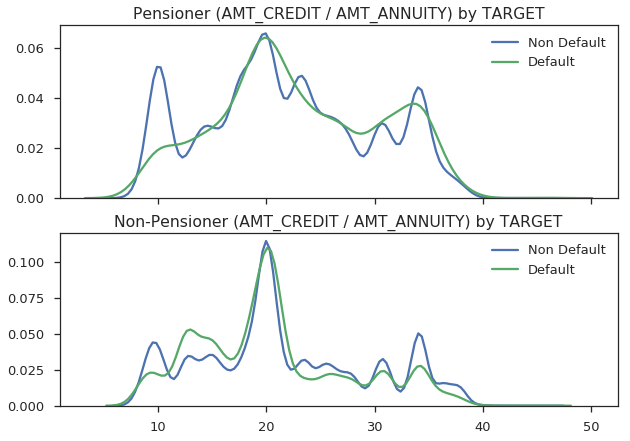

In [71]:
fig, ax = plt.subplots(2, sharex=True, figsize=(10, 7))

mask = (app_train.NAME_INCOME_TYPE == 'Pensioner')

sns.kdeplot(app_train.loc[mask & (app_train.TARGET == 0), 'AMT_CREDIT'] /\
            app_train.loc[mask & (app_train.TARGET == 0), 'AMT_ANNUITY'], label='Non Default', ax=ax[0])

sns.kdeplot(app_train.loc[mask & (app_train.TARGET == 1), 'AMT_CREDIT'] /\
            app_train.loc[mask & (app_train.TARGET == 1), 'AMT_ANNUITY'], label='Default', ax=ax[0])

mask = (app_train.NAME_INCOME_TYPE == 'Pensioner')
sns.kdeplot(app_train.loc[~mask & (app_train.TARGET == 0), 'AMT_CREDIT'] /\
            app_train.loc[~mask & (app_train.TARGET == 0), 'AMT_ANNUITY'], label='Non Default', ax=ax[1])
sns.kdeplot(app_train.loc[~mask & (app_train.TARGET == 1), 'AMT_CREDIT'] /\
            app_train.loc[~mask & (app_train.TARGET == 1), 'AMT_ANNUITY'], label='Default', ax=ax[1])

ax[0].set_title('Pensioner (AMT_CREDIT / AMT_ANNUITY) by TARGET')
ax[1].set_title('Non-Pensioner (AMT_CREDIT / AMT_ANNUITY) by TARGET');

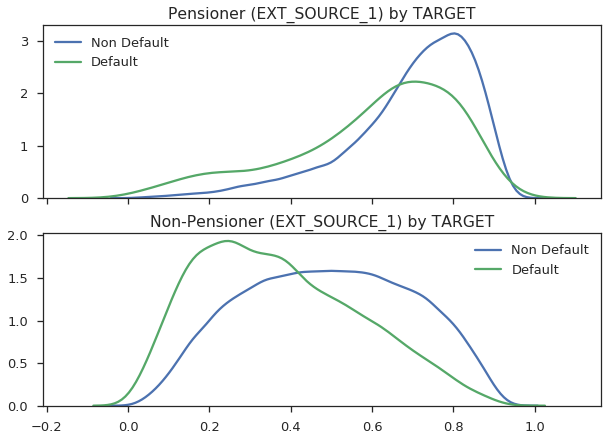

In [72]:
fig, ax = plt.subplots(2, sharex=True, figsize=(10, 7))

mask = (app_train.NAME_INCOME_TYPE == 'Pensioner')

sns.kdeplot(app_train.loc[mask & (app_train.TARGET == 0), 'EXT_SOURCE_1'] , label='Non Default', ax=ax[0])
sns.kdeplot(app_train.loc[mask & (app_train.TARGET == 1), 'EXT_SOURCE_1'], label='Default', ax=ax[0])

mask = (app_train.NAME_INCOME_TYPE == 'Pensioner')
sns.kdeplot(app_train.loc[~mask & (app_train.TARGET == 0), 'EXT_SOURCE_1'], label='Non Default', ax=ax[1])
sns.kdeplot(app_train.loc[~mask & (app_train.TARGET == 1), 'EXT_SOURCE_1'], label='Default', ax=ax[1])

ax[0].set_title('Pensioner (EXT_SOURCE_1) by TARGET')
ax[1].set_title('Non-Pensioner (EXT_SOURCE_1) by TARGET');

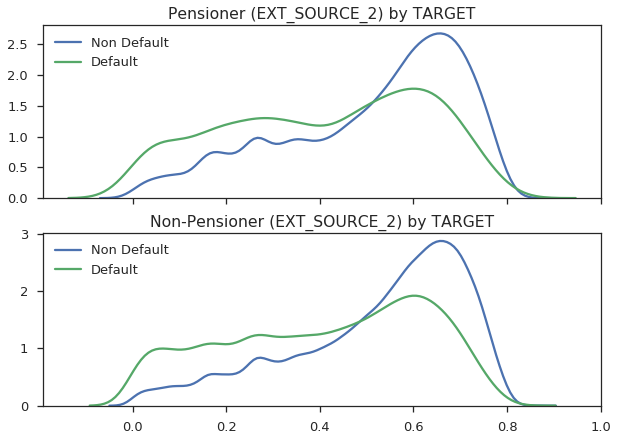

In [73]:
fig, ax = plt.subplots(2, sharex=True, figsize=(10, 7))

mask = (app_train.NAME_INCOME_TYPE == 'Pensioner')

sns.kdeplot(app_train.loc[mask & (app_train.TARGET == 0), 'EXT_SOURCE_2'] , label='Non Default', ax=ax[0])
sns.kdeplot(app_train.loc[mask & (app_train.TARGET == 1), 'EXT_SOURCE_2'], label='Default', ax=ax[0])

mask = (app_train.NAME_INCOME_TYPE == 'Pensioner')
sns.kdeplot(app_train.loc[~mask & (app_train.TARGET == 0), 'EXT_SOURCE_2'], label='Non Default', ax=ax[1])
sns.kdeplot(app_train.loc[~mask & (app_train.TARGET == 1), 'EXT_SOURCE_2'], label='Default', ax=ax[1])

ax[0].set_title('Pensioner (EXT_SOURCE_2) by TARGET')
ax[1].set_title('Non-Pensioner (EXT_SOURCE_2) by TARGET');

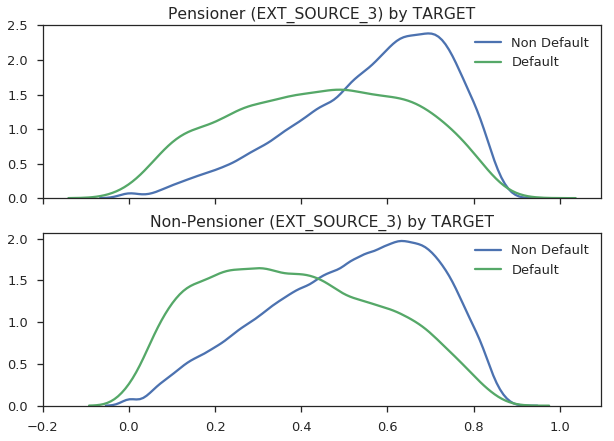

In [74]:
fig, ax = plt.subplots(2, sharex=True, figsize=(10, 7))

mask = (app_train.NAME_INCOME_TYPE == 'Pensioner')

sns.kdeplot(app_train.loc[mask & (app_train.TARGET == 0), 'EXT_SOURCE_3'] , label='Non Default', ax=ax[0])
sns.kdeplot(app_train.loc[mask & (app_train.TARGET == 1), 'EXT_SOURCE_3'], label='Default', ax=ax[0])

mask = (app_train.NAME_INCOME_TYPE == 'Pensioner')
sns.kdeplot(app_train.loc[~mask & (app_train.TARGET == 0), 'EXT_SOURCE_3'], label='Non Default', ax=ax[1])
sns.kdeplot(app_train.loc[~mask & (app_train.TARGET == 1), 'EXT_SOURCE_3'], label='Default', ax=ax[1])

ax[0].set_title('Pensioner (EXT_SOURCE_3) by TARGET')
ax[1].set_title('Non-Pensioner (EXT_SOURCE_3) by TARGET');

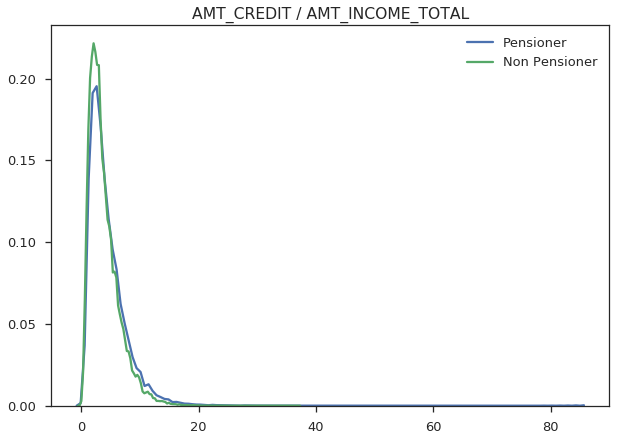

In [29]:
mask = (app_train.NAME_INCOME_TYPE == 'Pensioner')

plt.figure(figsize=(10, 7))
sns.kdeplot(app_train.loc[mask, 'AMT_CREDIT'] / app_train.loc[mask, 'AMT_INCOME_TOTAL'], label='Pensioner')
sns.kdeplot(app_train.loc[~mask, 'AMT_CREDIT'] / app_train.loc[~mask, 'AMT_INCOME_TOTAL'], label='Non Pensioner')
plt.title('AMT_CREDIT / AMT_INCOME_TOTAL');

In [35]:
prev_app.head().T

,0,1,2,3,4
SK_ID_PREV,2030495,2802425,2523466,2819243,1784265
SK_ID_CURR,271877,108129,122040,176158,202054
NAME_CONTRACT_TYPE,Consumer loans,Cash loans,Cash loans,Cash loans,Cash loans
AMT_ANNUITY,1730.43,25188.6,15060.7,47041.3,31924.4
AMT_APPLICATION,17145,607500,112500,450000,337500
AMT_CREDIT,17145,679671,136444,470790,404055
AMT_DOWN_PAYMENT,0,NaN,NaN,NaN,NaN
AMT_GOODS_PRICE,17145,607500,112500,450000,337500
WEEKDAY_APPR_PROCESS_START,SATURDAY,THURSDAY,TUESDAY,MONDAY,THURSDAY
HOUR_APPR_PROCESS_START,15,11,11,7,9


In [32]:
mask = prev_app.NAME_CONTRACT_STATUS == 'Approved'

tmp  = app_train.loc[:, ['SK_ID_CURR', 'NAME_INCOME_TYPE', 'TARGET']]\
                .merge(prev_app.loc[mask, ['SK_ID_CURR', 'CNT_PAYMENT']])

,SK_ID_CURR,NAME_INCOME_TYPE,TARGET,CNT_PAYMENT
0,100002,Working,1.0,24.0
1,100003,State servant,0.0,12.0
2,100003,State servant,0.0,6.0
3,100003,State servant,0.0,12.0
4,100004,Working,0.0,4.0


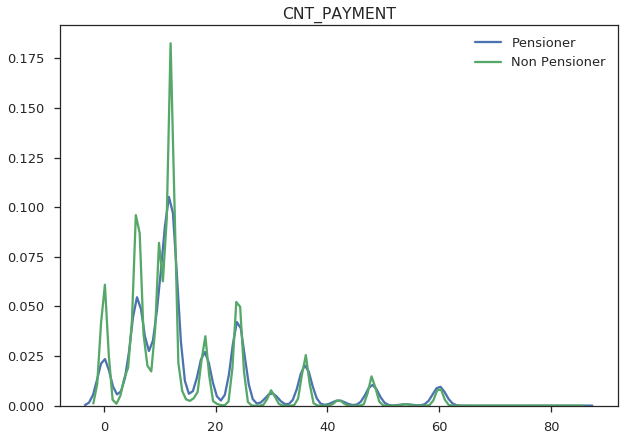

In [33]:
mask = (tmp.NAME_INCOME_TYPE == 'Pensioner')

plt.figure(figsize=(10, 7))
sns.kdeplot(tmp.loc[mask, 'CNT_PAYMENT'], label='Pensioner')
sns.kdeplot(tmp.loc[~mask, 'CNT_PAYMENT'], label='Non Pensioner')
plt.title('CNT_PAYMENT');

In [36]:
mask = prev_app.NAME_CONTRACT_STATUS == 'Approved'

tmp  = app_train.loc[:, ['SK_ID_CURR', 'NAME_INCOME_TYPE', 'TARGET']]\
                .merge(prev_app.loc[mask, ['SK_ID_CURR', 'DAYS_DECISION']])

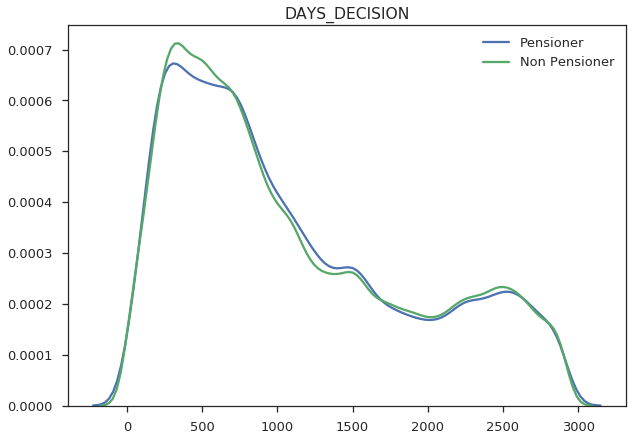

In [37]:
mask = (tmp.NAME_INCOME_TYPE == 'Pensioner')

plt.figure(figsize=(10, 7))
sns.kdeplot(-tmp.loc[mask, 'DAYS_DECISION'], label='Pensioner')
sns.kdeplot(-tmp.loc[~mask, 'DAYS_DECISION'], label='Non Pensioner')
plt.title('DAYS_DECISION');

In [61]:
mask = prev_app.NAME_CONTRACT_STATUS == 'Approved'                                           

tmp  = app_train.loc[:, ['SK_ID_CURR', 'NAME_INCOME_TYPE', 'TARGET']]\
                .merge((installments.AMT_INSTALMENT - installments.AMT_PAYMENT)\
                        .groupby(installments.SK_ID_CURR)\
                        .mean()\
                        .reset_index()\
                        .rename(columns={0: 'diff_inst_payment'}),
                       on='SK_ID_CURR',
                       how='left'
                      )

tmp.head()

,SK_ID_CURR,NAME_INCOME_TYPE,TARGET,diff_inst_payment
0,100002,Working,1.0,0.000000
1,100003,State servant,0.0,0.000000
2,100004,Working,0.0,0.000000
3,100006,Working,0.0,0.000000
4,100007,Working,0.0,452.384308


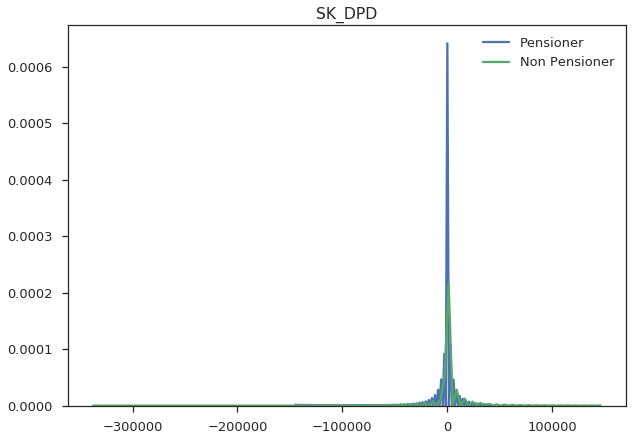

In [63]:
mask = (tmp.NAME_INCOME_TYPE == 'Pensioner')

plt.figure(figsize=(10, 7))

sns.kdeplot(tmp.loc[mask, 'diff_inst_payment'], label='Pensioner')
sns.kdeplot(tmp.loc[~mask, 'diff_inst_payment'], label='Non Pensioner')

plt.title('SK_DPD');

In [76]:
app_train.NAME_INCOME_TYPE.value_counts()

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

In [75]:
app_train.NAME_INCOME_TYPE.cat.codes.value_counts()

7    158774
1     71617
3     55362
4     21703
6        22
5        18
0        10
2         5
dtype: int64